In [1]:
import sys
sys.path.append('/dls_sw/i16/software/python')
from pdnx import *
from matplotlib.pyplot import *


# use new modified NeXus file with NXmx in a second subentry
p = '%i.nxs'
d = '%i.dat'
e = '%i.xls'

n = pdnx(p % 815893, entry = None, data = None) # load NeXus file into pdnx (pandas/NeXus) object 

=== Importing dlstools package


In [11]:
#dependencies - ignore
#import pkg_resources
#pkg_resources.get_distribution("xlrd").version

#nexusformat==0.6.1
#pandas==0.24.2
#matplotlib==3.1.2
#numpy==1.18.1
#xlrd==1.2.0

In [3]:
n # display pandas dataframe (all columns in scan)

,TimeFromEpoch,TimeSec,beamOK,count_time,delta_axis_offset,eta,ic1monitor,kap,kdelta,kgam,kmu,kphi,kth,maxval,maxx,maxy,path,rc,roi2_maxval,roi2_maxx,roi2_maxy,roi2_sum,sum
0,1.582424e+09,361029.445210,1.0,1.0,8.8,30.968032,2160.062235,-135.597754,64.693146,0.0,0.0,64.357226,88.555967,4.0,270.0,7.0,1.0,298.039581,2.0,4.0,1.0,69.0,2109.0
1,1.582424e+09,361031.738913,1.0,1.0,8.8,30.988032,2161.649749,-135.597754,64.693146,0.0,0.0,64.357226,88.575967,5.0,200.0,108.0,2.0,298.018158,2.0,26.0,3.0,65.0,2061.0
2,1.582424e+09,361034.027178,1.0,1.0,8.8,31.008032,2160.733886,-135.597754,64.693146,0.0,0.0,64.357226,88.595967,6.0,100.0,160.0,3.0,297.998291,2.0,7.0,9.0,62.0,1986.0
3,1.582424e+09,361036.325025,1.0,1.0,8.8,31.028032,2160.489628,-135.597754,64.693146,0.0,0.0,64.357226,88.615967,5.0,395.0,41.0,4.0,297.976837,2.0,22.0,5.0,71.0,2131.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,1.582425e+09,361229.074869,1.0,1.0,8.8,32.508032,2165.007912,-135.597754,64.693146,0.0,0.0,64.357226,90.095967,4.0,380.0,38.0,78.0,301.245911,3.0,4.0,25.0,58.0,2030.0
78,1.582425e+09,361231.350528,1.0,1.0,8.8,32.528032,2164.061488,-135.597754,64.693146,0.0,0.0,64.357226,90.115967,4.0,235.0,38.0,79.0,301.225952,2.0,33.0,11.0,57.0,1998.0
79,1.582425e+09,361233.651018,1.0,1.0,8.8,32.548032,2164.458367,-135.597754,64.693146,0.0,0.0,64.357226,90.135967,4.0,277.0,137.0,80.0,301.209229,3.0,42.0,31.0,42.0,2031.0
80,1.582425e+09,361235.927211,1.0,1.0,8.8,32.568032,2164.397337,-135.597754,64.693146,0.0,0.0,64.357226,90.155967,4.0,142.0,12.0,81.0,301.189423,2.0,1.0,4.0,70.0,1981.0


In [4]:
print(n.nx.tree)

root:NXroot
  @HDF5_Version = '1.10.4'
  @file_name = '/dls/science/users/spc93/misc_nexus_data/modif...'
  @file_time = '2020-05-18T15:56:17.710273'
  @h5py_version = '2.9.0'
  @nexusformat_version = '0.4.18'
  entry1:NXentry
    @default = 'scan'
    before_scan:NXcollection
      @target = '/entry1/before_scan'
      PPR:NXcollection
        ppchi = -44.999841517
        pppiezo1 = 0.0
        pppiezo2 = 12345.012359999999
        ppth1 = 0.0006406764
        ppth2 = -12.0003723606
        ppz1 = 11.0
        ppz2 = 11.0
      alpha:NXcollection
        alpha = -9.057964864867165
      beamline_slits:NXcollection
        s1xcentre = -0.005
        s1xgap = 2.51
        s1ycentre = 0.0015
        s1ygap = 1.001
        s2xcentre = -0.00079375
        s2xgap = 4.9988625
        s2ycentre = 0.499
        s2ygap = 20.001
        s3xcentre = 2.69725
        s3xgap = 25.0015
        s3ycentre = -0.682
        s3ygap = 20.125
        s4xcentre = -5.875
        s4xgap = 36.6504
        s4yc

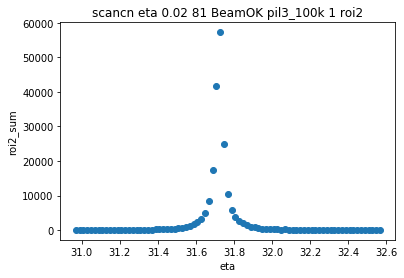

In [5]:
n.nx.plot() # default NeXus plot

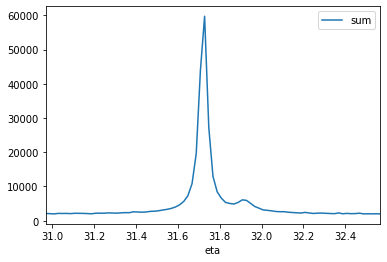

In [6]:
n.plot('eta','sum')  # pandas plot

In [7]:
n['rat'] = n['sum']/n['ic1monitor']  # add a new column (pandas series) to dataframe
n[['eta', 'sum', 'rat']]             # display three fields (including the new one)

,eta,sum,rat
0,30.968032,2109.0,0.976361
1,30.988032,2061.0,0.953438
2,31.008032,1986.0,0.919132
3,31.028032,2131.0,0.986350
...,...,...,...
77,32.508032,2030.0,0.937641
78,32.528032,1998.0,0.923264
79,32.548032,2031.0,0.938341
80,32.568032,1981.0,0.915266


In [8]:
n.meta() # all scannable fields from 'flat list'

Scannable,Field,Value
PPR,ppchi,-44.999841517
PPR,pppiezo1,0.0
PPR,pppiezo2,12345.012359999999
PPR,ppth1,0.0006406764
PPR,ppth2,-12.0003723606
PPR,ppz1,11.0
PPR,ppz2,11.0
alpha,alpha,-9.057964864867165
beamline_slits,s1xcentre,-0.005
beamline_slits,s1xgap,2.51


In [ ]:
n.meta('PPR', 'mono') # select two scannables

In [12]:
n.to_srs(d % 815893)         # export to classic SRS .dat file
n.to_srs_plus(d % 815894)    # export to enhanced SRS .dat file (metadata as key-value pair assignments)
n.to_excel(e % 815894)       # export to spreadsheet